# Inferential Statistics


The data used here is the cleaned up version of the 2008 infant natality/mortality dataset. The cleaning steps are discussed in the data wrangling notebook and word document. This notebook shows the application of inferential statiscis for capstone project 1.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import os.path
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
#Load the cleaned up dataset.
final_2008 = pd.read_pickle('CleanData_ML_UC')

In [3]:
#Remove any spaces in the column names for easy manipulation.
final_2008.rename(columns=lambda x: x.strip(),inplace = True)

**Inferential Statistics regarding admission to NICU and infant mortality**

The plots below show the proportion of infants admitted to NICU in the mortality dataset (left) and in the non-mortality dataset (right). In this notebook, I will attempt to see if there is a statistically significant difference in infant mortality depending on whether an infant had been admitted to NICU or not.

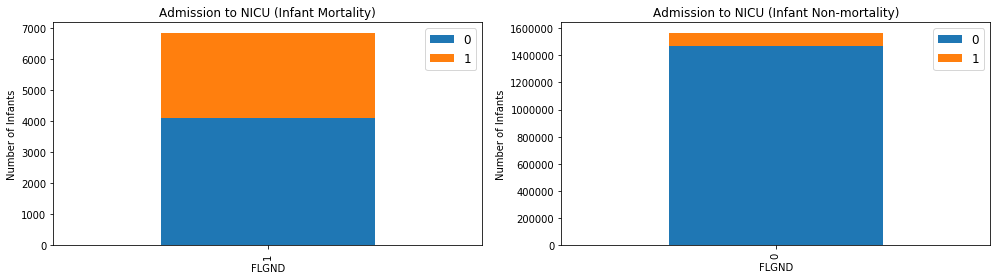

In [4]:
AB_NICU=final_2008[['AB_NICU','FLGND']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
AB_NICU[AB_NICU.FLGND == '1'][['FLGND','AB_NICU']].groupby(['AB_NICU','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax1,figsize=(14,4),stacked=True,title="Admission to NICU (Infant Mortality)")
AB_NICU[AB_NICU.FLGND == '0'][['FLGND','AB_NICU']].groupby(['AB_NICU','FLGND']).size().unstack().unstack().unstack().plot(kind='bar', ax=ax2,figsize=(14,4),stacked=True,title="Admission to NICU (Infant Non-mortality)")
ax1.set_ylabel('Number of Infants')
ax2.set_ylabel('Number of Infants')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.tight_layout()

**Null and Alternate Hypothesis**

**Ho:** There is no difference in infant mortality between infants admitted to NICU and those who were not admitted <br/>
**Ha:** There is a difference in infant mortality between infants admitted to NICU and those who were not admitted 

In [5]:
NICUtot = final_2008[final_2008['AB_NICU'] == '1'].shape[0]
NICUlive=final_2008[(final_2008['AB_NICU'] == '1') & (final_2008['FLGND'] == '0')].shape[0]
NICUdead=final_2008[(final_2008['AB_NICU'] == '1') & (final_2008['FLGND'] == '1')].shape[0]

In [6]:
print(NICUtot, NICUlive, NICUdead)

97529 94787 2742


In [7]:
NoNICUtot = final_2008[final_2008['AB_NICU'] == '0'].shape[0]
NoNICUlive=final_2008[(final_2008['AB_NICU'] == '0') & (final_2008['FLGND'] == '0')].shape[0]
NoNICUdead=final_2008[(final_2008['AB_NICU'] == '0') & (final_2008['FLGND'] == '1')].shape[0]

In [8]:
print(NoNICUtot, NoNICUlive, NoNICUdead)

1472233 1468144 4089


In [9]:
INFANTdeadtot = final_2008[final_2008['FLGND'] == '1'].shape[0]
INFANTlivetot = final_2008[final_2008['FLGND'] == '1'].shape[0]
print(INFANTdeadtot)

6831


In [10]:
print("The total number of infants admitted to NICU is {}".format(NICUtot))
print("The total number of infants admitted to NICU who lived at the time of report is {}".format(NICUlive))
print("The total number of infants admitted to NICU who died is {:3.0f}".format(NICUdead))
print("The total number of infants who were not admitted to NICU is {}".format(NoNICUtot))
print("The total number of infants who were not admitted to NICU and who lived at the time of report is {}".format(NoNICUlive))
print("The total number of infants who were not admitted to NICU and who died is {:3.0f}".format(NoNICUdead))

The total number of infants admitted to NICU is 97529
The total number of infants admitted to NICU who lived at the time of report is 94787
The total number of infants admitted to NICU who died is 2742
The total number of infants who were not admitted to NICU is 1472233
The total number of infants who were not admitted to NICU and who lived at the time of report is 1468144
The total number of infants who were not admitted to NICU and who died is 4089


In [35]:
NICUdead_mean = (1 * NICUdead + 0 * NICUlive)/NICUtot
NICUdead_var = (NICUdead_mean * (1 - NICUdead_mean))/NICUtot
NoNICUdead_mean = (1 * NoNICUdead + 0 * NoNICUlive)/NoNICUtot
NoNICUdead_var = (NoNICUdead_mean * (1 - NoNICUdead_mean))/NoNICUtot

In [36]:
print("The mean of mortality for infants admitted to NICU is {:0.4f}".format(NICUdead_mean))
print("The mean of mortality for infants not admitted to NICU is {:0.4f}".format(NoNICUdead_mean))
print("The variance of mortality for infants admitted to NICU is {:0.9f}".format(NICUdead_var))
print("The variance of mortality for infants not admitted to NICU is {:0.9f}".format(NoNICUdead_var))

The mean of mortality for infants admitted to NICU is 0.0281
The mean of mortality for infants not admitted to NICU is 0.0028
The variance of mortality for infants admitted to NICU is 0.000000280
The variance of mortality for infants not admitted to NICU is 0.000000002


In [38]:
LIVEtotal = NoNICUlive + NICUlive
DEADtotal = NoNICUdead + NICUdead
DEADmean = DEADtotal/(DEADtotal + LIVEtotal)
print(LIVEtotal, DEADtotal, DEADmean)

1562931 6831 0.004351615085598963


In [39]:
DEADtotal_var = NICUdead_var + NoNICUdead_var
DEADtotal_std = np.sqrt(DEADtotal_var)
print(DEADtotal_std)

0.000531080934961


In [42]:
DEADdiff = NICUdead_mean - NoNICUdead_mean
z_score = (DEADdiff - 0)/DEADtotal_std
CIu = 1.96 * DEADtotal_std
pval = stats.norm.sf(np.abs(z_score))*2

In [46]:
print("The mean infant mortality whether admitted to NICU or not is {:0.4f}".format(DEADmean))
print("The standard deviation infant mortality whether admitted to NICU or not is {:0.4f}".format(DEADtotal_std))
print("The difference in mean of mortality between infants admitted and not admitted to NICU is {:0.4f}".format(DEADdiff))
print("The z score associated with the calculated mean given the null hypothesis is {:0.4f}".format(z_score))
print("The upper bound for 95% confidence is {:0.4f}".format(DEADdiff + CIu))
print("The lower bound for 95% confidence is {:0.4f}".format(DEADdiff - CIu))
print("The p-value associated with the calculated z score given the null hypothesis is {:0.6f}".format(pval))

The mean infant mortality whether admitted to NICU or not is 0.0044
The standard deviation infant mortality whether admitted to NICU or not is 0.0005
The difference in mean of mortality between infants admitted and not admitted to NICU is 0.0253
The z score associated with the calculated mean given the null hypothesis is 47.7089
The upper bound for 95% confidence is 0.0264
The lower bound for 95% confidence is 0.0243
The p-value associated with the calculated z score given the null hypothesis is 0.000000


**The results show that there is a statistically significant difference between difference in infant mortality between infants admitted to NICU and those who were not admitted. There is a 95% chance that the difference in infant mortality between infants admitted to NICU and those who were not admitted lies in the interval [0.0243,0.0264].**